**Now on to linear algebra. Woot!**
How about ... this? Get it?

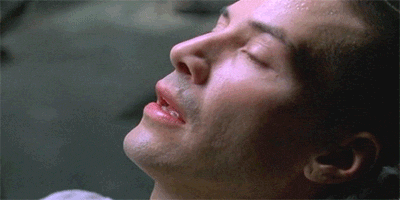

In [4]:
from numpy import array,empty
A = array([[2,1,4,1],
          [3,4,-1,-1],
          [1,-4,1,5],
          [2,-2,1,3]],float)
v = array([-4,3,9,7],float)
N = len(v)

### Solve Ax = v, ie find the unknown column vector x
### Use Gaussian elimination!

for m in range(N):
  # Divide by the diagonal element first to set it to 1
  div = A[m,m] ### if this is zero, we will break things!
  A[m,:] /= div ### divide everything in the row of this array
  v[m] /= div ### divide v

  ### We want to get zeros below this diagonal element, to do this we:
  ### 1) Multiply the row we just looked at above (which starts with 1 now)
  ###    by the value of the first element in this row below it
  ### 2) Subtract that value from this new row below it, giving us zero
  for i in range(m+1,N):
    mult = A[i,m] ### for each row i below the one above, column is still the same column as above
    A[i,:] -= mult*A[m,:] ### subtract from this row the multiplicative factor above
    v[i] -= mult*v[m] ### do the same for v so equations are consistent

### Done! Now backsubstitute
x = empty(N,float)
for m in range(N-1, -1, -1): ### go in reverse order
  x[m] = v[m] ### we have x now, it's just equal to v
  for i in range (m+1, N): ### we have to update the remaining pieces
    x[m] -= A[m,i]*x[i]

print(x)

[ 2. -1. -2.  1.]


In [24]:
from numpy import array,empty

### Solve Ax = v, ie find the unknown column vector x
def partialPivoter(A,v):
  print("A=",A)
  print("v =",v)

  N = len(v)
  for m in range(N):

    # Before any Gaussian elimination find the row with the largest pivot element
    pivot = m
    largest = A[m,m]
    for i in range(m+1,N):
      if abs(A[i,m]) > largest:
        largest = abs(A[i,m])
        pivot = i

    ## we found the pivot, so now swap rows, do it entry-by-entry across columns
    for i in range(N):
      A[m,i],A[pivot,i] = A[pivot,i],A[m,i]

    # and swap the row in v too!
    v[m],v[pivot] = v[pivot],v[m]

    # Now run Gaussian elimination!
    # Divide by the diagonal element first to set it to 1
    div = A[m,m] ### if this is zero, we will break things!
    A[m,:] /= div ### divide everything in the row of this array
    v[m] /= div ### divide v

    ### We want to get zeros below this diagonal element, to do this we:
    ### 1) Multiply the row we just looked at above (which starts with 1 now)
    ###    by the value of the first element in this row below it
    ### 2) Subtract that value from this new row below it, giving us zero
    for i in range(m+1,N):
      mult = A[i,m] ### for each row i below the one above, column is still the same column as above
      A[i,:] -= mult*A[m,:] ### subtract from this row the multiplicative factor above
      v[i] -= mult*v[m] ### do the same for v so equations are consistent

  ### Done! Now backsubstitute
  x = empty(N,float)
  for m in range(N-1, -1, -1): ### go in reverse order
    x[m] = v[m] ### we have x now, it's just equal to v
    for i in range (m+1, N): ### we have to update the remaining pieces
      x[m] -= A[m,i]*x[i]
  print("Ax = v has solution x = ",x)
  return x

A = array([[2,1,4,1],
          [3,4,-1,-1],
          [1,-4,1,5],
          [2,-2,1,3]],float)
v = array([-4,3,9,7],float)

x = partialPivoter(A,v)

A = array([[0,1,4,1],
          [3,4,-1,-1],
          [1,-4,1,5],
          [2,-2,1,3]],float)
v = array([-4,3,9,7],float)
x = partialPivoter(A,v)


A= [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
v = [-4.  3.  9.  7.]
Ax = v has solution x =  [ 2. -1. -2.  1.]
A= [[ 0.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
v = [-4.  3.  9.  7.]
Ax = v has solution x =  [ 1.61904762 -0.42857143 -1.23809524  1.38095238]


In [ ]:
import numpy as np
import random as rand
A=np.zeros(25)
A=A.reshape(5,5)
v=np.zeros(5)
v=v.reshape(5,1)
for ix in range(5):
  v[ix][0]=rand.randint(0,10)
  for iy in range(5):
    A[ix,iy]=rand.randint(0,10)
print("A=\n",A)
print("v=\n",v)
x=np.linalg.solve(A,v)
print("Solving for x in Ax=v, x=\n",x)

A=
 [[10.  7.  2.  2.  1.]
 [ 8.  5.  4.  5.  3.]
 [ 4.  0.  1.  8.  4.]
 [ 3.  5.  0.  6.  4.]
 [ 9.  1.  7.  9.  0.]]
v=
 [[ 2.]
 [ 0.]
 [10.]
 [ 0.]
 [ 6.]]
Solving for x in Ax=v, x=
 [[ 1.71337266]
 [-1.77531957]
 [-1.99606686]
 [ 0.70304818]
 [-0.12045231]]


In [ ]:
print("A=",A)
print("v=",v)
print("x=",x)
print("Numpy multiplication = ",A*x)
print("Matrix multi = ",np.matmul(A,x))


A= [[10.  7.  2.  2.  1.]
 [ 8.  5.  4.  5.  3.]
 [ 4.  0.  1.  8.  4.]
 [ 3.  5.  0.  6.  4.]
 [ 9.  1.  7.  9.  0.]]
v= [[ 2.]
 [ 0.]
 [10.]
 [ 0.]
 [ 6.]]
x= [[ 1.71337266]
 [-1.77531957]
 [-1.99606686]
 [ 0.70304818]
 [-0.12045231]]
Numpy multiplication =  [[ 17.13372665  11.99360865   3.42674533   3.42674533   1.71337266]
 [-14.20255654  -8.87659784  -7.10127827  -8.87659784  -5.3259587 ]
 [ -7.98426745  -0.          -1.99606686 -15.96853491  -7.98426745]
 [  2.10914454   3.5152409    0.           4.21828909   2.81219272]
 [ -1.0840708   -0.12045231  -0.84316618  -1.0840708   -0.        ]]
Matrix multi =  [[ 2.00000000e+00]
 [-5.13478149e-16]
 [ 1.00000000e+01]
 [-3.88578059e-16]
 [ 6.00000000e+00]]


In [ ]:
import numpy as np
v=np.zeros(5)
v2=v.reshape(5,1)
print(v)
print(v2)
v3=np.zeros([5,1])
print(v3)

[0. 0. 0. 0. 0.]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


[[-6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.
  -6. -6. -6. -6. -6. -6. -6. -6.]
 [ 2.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
   8.  8.  8.  8.  8.  8.  8.  2.]
 [-6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.
  -6. -6. -6. -6. -6. -6. -6. -6.]]


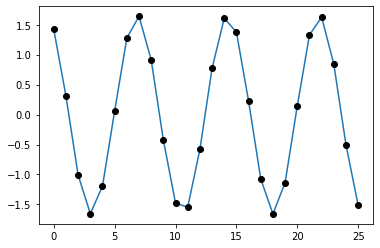

In [ ]:
### Example 6.2
### N identical masses in a row, ignoring gravity
### Make used of the banded function (we can import it as in the book or just define it here as below)

######################################################################
#
# Function to solve a banded system of linear equations using
# Gaussian elimination and backsubstitution
#
# x = banded(A,v,up,down)
#
# This function returns the vector solution x of the equation A.x = v,
# where v is an array representing a vector of N elements, either real
# or complex, and A is an N by N banded matrix with "up" nonzero
# elements above the diagonal and "down" nonzero elements below the
# diagonal.  The matrix is specified as a two-dimensional array of
# (1+up+down) by N elements with the diagonals of the original matrix
# along its rows, thus:
#
#   (  -   -  A02 A13 A24 ...
#   (  -  A01 A12 A23 A34 ...
#   ( A00 A11 A22 A33 A44 ...
#   ( A10 A21 A32 A43 A54 ...
#   ( A20 A31 A42 A53 A64 ...
#
# Elements represented by dashes are ignored -- it doesn't matter what
# these elements contain.  The size of the system is taken from the
# size of the vector v.  If the matrix A is larger than NxN then the
# extras are ignored.  If it is smaller, the program will produce an
# error.
#
# The function is compatible with version 2 and version 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, September 4, 2011
# You may use, share, or modify this file freely
#
######################################################################

from numpy import copy

def banded(Aa,va,up,down):
    print(Aa)
    # Copy the inputs and determine the size of the system
    A = copy(Aa)
    v = copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v


from numpy import empty,zeros
from pylab import plot,show

# Constants
N = 26
C = 1.0
m = 1.0
k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

# Set up the initial values of the arrays
A = empty([3,N],float)
A[0,:] = -k
A[1,:] = alpha
A[2,:] = -k
A[1,0] = alpha - k
A[1,N-1] = alpha - k
v = zeros(N,float)
v[0] = C

# solve the equations
x = banded(A,v,1,1)

# Make a plot using both dots and lines
plot(x)
plot(x,"ko")
show()



In [ ]:
from numpy import array,empty
N=5
A = empty([N,N],dtype="object")
A[0,0] = "a00"
A[0,1] = "a01"
A[0,2] = "a02"
A[0,3] = "000"
A[0,4] = "000"
A[1,0] = "a10"
A[1,1] = "a11"
A[1,2] = "a12"
A[1,3] = "a13"
A[1,4] = "000"
A[2,0] = "000"
A[2,1] = "a21"
A[2,2] = "a22"
A[2,3] = "a23"
A[2,4] = "a24"
A[3,0] = "000"
A[3,1] = "000"
A[3,2] = "a32"
A[3,3] = "a33"
A[3,4] = "a34"
A[4,0] = "000"
A[4,1] = "000"
A[4,2] = "000"
A[4,3] = "a43"
A[4,4] = "a44"

A2 = empty([4,5],dtype="object")
A2[0,0] = "---"
A2[0,1] = "---"
A2[0,2] = "a02"
A2[0,3] = "a13"
A2[0,4] = "a24"
A2[1,0] = "---"
A2[1,1] = "a01"
A2[1,2] = "a12"
A2[1,3] = "a23"
A2[1,4] = "a34"
A2[2,0] = "a00"
A2[2,1] = "a11"
A2[2,2] = "a22"
A2[2,3] = "a33"
A2[2,4] = "a44"
A2[3,0] = "a10"
A2[3,1] = "a21"
A2[3,2] = "a32"
A2[3,3] = "a33"
A2[3,4] = "a43"

print("Original matrix = \n",A)
print("Banded input = \n",A2)

Original matrix = 
 [['a00' 'a01' 'a02' '000' '000']
 ['a10' 'a11' 'a12' 'a13' '000']
 ['000' 'a21' 'a22' 'a23' 'a24']
 ['000' '000' 'a32' 'a33' 'a34']
 ['000' '000' '000' 'a43' 'a44']]
Banded input = 
 [['---' '---' 'a02' 'a13' 'a24']
 ['---' 'a01' 'a12' 'a23' 'a34']
 ['a00' 'a11' 'a22' 'a33' 'a44']
 ['a10' 'a21' 'a32' 'a33' 'a43']]


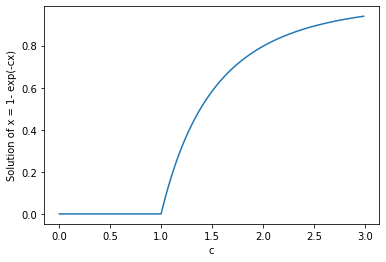

In [ ]:
### Exercise 6.10, solve x = 1-e^{-cx} for unknown c

from math import exp
from numpy import arange
from pylab import plot,xlabel,ylabel,show

target = 1e-6 # Target accuracy

def f(x,c):
  return 1-exp(-c*x)

def fp(x,c):
  return c*exp(-c*x)

cpoints=arange(0,3,0.01)
xpoints=[]
for c in cpoints:
  x = 1.0
  epsilon = 1.0
  while epsilon > target:
    xp = f(x,c)
    derivative = fp(xp,c)
    if (derivative < 1e-10): derivative = 1e-10
    epsilon = abs((xp-x)/(1-1/derivative))
    x = xp
  xpoints.append(x)

plot(cpoints,xpoints)
xlabel("c")
ylabel("Solution of x = 1- exp(-cx)")
show()


In [ ]:
import numpy as np
from numpy.linalg import inv
from numpy import matmul
import random as rand
A=np.zeros(25)
A=A.reshape(5,5)
for ix in range(5):
  for iy in range(5):
    A[ix,iy]=rand.randint(0,10)
invA = inv(A)
print("A=\n",A)
print("A inverse = \n",invA)
print("A*A-1 = ",matmul(A,invA))

A=
 [[ 1.  7. 10.  0.  3.]
 [ 3.  2.  4.  3.  5.]
 [ 5.  1. 10.  1.  9.]
 [ 7. 10.  7.  4.  0.]
 [ 7.  2.  8.  4.  6.]]
A inverse = 
 [[-0.21538462 -0.18461538  0.24615385  0.18461538 -0.10769231]
 [-0.06093514  0.17466063  0.13966817  0.1586727  -0.32458522]
 [ 0.1984917  -0.18280543 -0.18763198 -0.1505279   0.33453997]
 [ 0.18190045  0.20633484 -0.45158371 -0.20633484  0.41447964]
 [-0.11432881  0.26334842  0.21749623  0.06998492 -0.32187029]]
A*A-1 =  [[ 1.00000000e+00 -5.55111512e-17 -5.55111512e-17  1.66533454e-16
   2.77555756e-16]
 [ 0.00000000e+00  1.00000000e+00  1.66533454e-16 -1.66533454e-16
   1.66533454e-16]
 [-2.22044605e-16  5.55111512e-17  1.00000000e+00 -5.55111512e-17
   1.66533454e-16]
 [ 3.33066907e-16  0.00000000e+00 -2.22044605e-16  1.00000000e+00
   0.00000000e+00]
 [ 1.11022302e-16 -1.11022302e-16 -3.33066907e-16 -5.55111512e-16
   1.00000000e+00]]


In [ ]:
# Exercise 6.8 QR Algorithm

from numpy import sqrt,array,empty,zeros,dot,copy,matmul
from numpy import identity,absolute,max

# Magnitude of a vector
def mag(v):
  return sqrt(dot(v,v))

# Function to calculate QR decomposition
def QR(A):
  U = empty([N,N],float)
  Q = empty([N,N],float)
  R = zeros([N,N],float)

  for m in range(N):
    U[:,m] = A[:,m]
    for i in range(m):
      R[i,m] = dot(Q[:,i],A[:,m])
      U[:,m] -= R[i,m]*Q[:,i]
    R[m,m] = mag(U[:,m])
    Q[:,m] = U[:,m]/R[m,m]
  return Q,R

# Main program
A = array( [[1,4,8,4],
            [4,2,3,7],
            [8,3,6,9],
            [4,7,9,2]],float)

N = len(A)
epsilon = 1e-6


V = identity(N,float) # start with identity matrix
delta = 1.0
Q = empty([N,N],float)
R = zeros([N,N],float)

while delta > epsilon:
  # Perform a step of the QR alg
  Q,R = QR(A)
  A = dot(R,Q)
  V = dot(V,Q)

  # Find the largest off-diagonal element
  Ac = copy(A)
  for i in range(N): Ac[i,i] = 0.0
  delta = max(absolute(Ac))

print(A)
print(matmul(Q,R))
print(V)


[[ 2.10000000e+01  7.36067983e-07  2.00505365e-14 -4.44738475e-14]
 [ 7.36067998e-07 -8.00000000e+00  5.99038894e-08 -4.92772067e-15]
 [ 1.76373367e-14  5.99038974e-08 -3.00000000e+00 -2.06494012e-08]
 [ 5.69063112e-23  9.58659066e-16 -2.06493983e-08  1.00000000e+00]]
[[ 2.10000000e+01  1.93217851e-06  1.21048159e-13 -4.44738470e-14]
 [ 1.93217849e-06 -8.00000000e+00  1.59743718e-07  1.35556481e-14]
 [ 1.23461357e-13  1.59743727e-07 -3.00000000e+00 -6.19481921e-08]
 [ 1.19503254e-21  7.66927253e-15 -6.19481950e-08  1.00000000e+00]]
[[ 0.43151698 -0.38357064 -0.77459666 -0.25819889]
 [ 0.38357063  0.43151698 -0.2581989   0.77459667]
 [ 0.62330228  0.52740965  0.25819889 -0.51639778]
 [ 0.52740965 -0.62330227  0.51639779  0.25819889]]


In [ ]:
from math import sin,exp,cos,log
def f(x):
  return exp(1-x**3)-x ## x=exp(1-x**3)

a=-5
b=500000
midpoint=0.5*(a+b)
eval=f(midpoint)
if (f(a)*f(b) > 0): print("No good, initial endpoints have the same sign")
nmax=10000 ## break if we get stuck
n=0
epsilon=1e-12 ### how close we want to get

while((abs(b-a) > epsilon) and n < nmax):
  if ((f(midpoint) * f(a)) > 0): a = midpoint
  else: b = midpoint
  midpoint=0.5*(a+b)
  n = n+1
print("It took", n, "iterations", " and midpoint = ", midpoint)

It took 59 iterations  and midpoint =  0.9999999999999554


In [ ]:
def f(x):
  return 123*x**6 - 456*x**5 + 789*x**4 - 1012*x**3 + 3456*x**2 - 7890*x - 123456

def fp(x):
  return 6*123*x**5 - 5*456*x**4 + 4*789*x**3 - 3*1012*x**2 + 2*3456*x - 7890

accuracy = 1e-12
delta = 1.0
x = 1e10
N=0
while abs(delta) > accuracy:
  print(x,f(x))
  delta = f(x)/fp(x)
  x -= delta
  N=N+1
print("It took", N, "iterations to find x = ", x, "with f(x) = ", f(x))

0 -123456
-15.647148288973384 2284882392.7481956
-12.932936777144247 765362925.1015536
-10.670134492851775 256399548.95171815
-8.783275037965225 85904084.15108953
-7.209612236914117 28779627.872185085
-5.897482061407572 9633321.236099549
-4.805829513182988 3211818.4433509605
-3.906069257736046 1055569.4159664875
-3.1885335821275307 330739.576465556
-2.6733607021607932 89138.62727221672
-2.399589151476191 15278.445036927034
-2.330100771637851 760.3810914153146
-2.3262663997842448 2.1768706559814746
-2.3262553593216717 1.7987535102292895e-05
-2.3262553592304425 -1.4551915228366852e-11
It took 16 iterations to find x =  -2.3262553592304425 with f(x) =  -1.4551915228366852e-11


In [ ]:
# Exercise 6.17 using Newton's method
from math import sqrt,exp
R1 = 1000.0
R2 = 4000.0
R3 = 3000.0
R4 = 2000.0
Vp = 5.0
VT = 0.05
I0 = 3.0e-9
target = 1.0e-8

# initial guesses
V1 = 1.0
V2 = 1.0

# Main loop
error = 1.0
while error > target:
  # Calculate matrix elements and determinant
  # Remember, this is just a 2x2 matrix with element that are the derivatives
  # Let's check that the derivatives look right!
  x = exp((V1-V2)/VT)*I0/VT
  a = 1/R1 + 1/R2 + x
  b = -x
  c = -x
  d = 1/R3 + 1/R4 + x
  det = a*d - b*c

  # Calculate inverse
  ia = d/det
  id = a/det
  ib = -b/det
  ic = -c/det

  # Calculate vector elements

  # this is the big ugly piece
  y = I0*(exp(((V1-V2)/VT)-1))

  # Our two functions equal to zero
  z1 = (V1-Vp)/R1 + V1/R2 + y
  z2 = (V2-Vp)/R3 + V2/R4 - y

  # Calculate delta x using the inverse
  # Why? If J dot dx = f(x), then dx = J-1 f(x)
  deltaV1 = ia*z1 + ib*z2
  deltaV2 = ic*z1 + id*z2

  # Calculate the error
  error = sqrt(deltaV1**2+deltaV2**2)

  # Calculate new voltages, remember the minus sign
  V1 -= deltaV1
  V2 -= deltaV2

# Print results
print(V1,V2)

3.466244495626595 2.8006332565601078


# 6.16
If distance from earth to satellie is r and distance from earth to moon is R then distance from satellite to moon is R-r
As in the diagram the two gravitational forces are in opposite directions, and it is orbiting Earth, so the force towards the Earth is bigger. The sum of the forces is then:

$\frac{GM\mu}{r^2} - \frac{Gm\mu}{(R-r)^2}$, where $\mu$ is the mass of the satellite. This is then equal to the required centripetal force $\mu r\omega^2$:

$\frac{GM\mu}{r^2} - \frac{Gm\mu}{(R-r)^2} = \mu r \omega^2$. Canceling the common factor we get:

$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = r \omega^2$

In [ ]:
# 6.16
G = 6.674e-11 #Newton
M = 5.974e24 # mass of earth (kg)
m = 7.348e22 # mass of moon (kg)
R = 3.844e8 # distance from Earth to moon (m)
omega = 2.662e-6 # angular speed, rad/s
target = 1e-10

def f(r):
  return G*M/(r**2) - G*m/((R-r)**2) - omega*omega*r

# Initial guess
r1 = 0.00001*R
r2 = 0.9999*R
f2 = f(r1)

# Main loop
while abs(r1-r2) > target:
  f1,f2 = f2,f(r2)
  r1,r2 = r2,r2-f2*(r2-r1)/(f2-f1)

print("Distance to the L1 point is",r2," meters")
print("Distance to the L1 point is",0.001*r2," km")

Distance to the L1 point is 326045071.66535544  meters
Distance to the L1 point is 326045.07166535547  km
